# Exploring Weather Trends 
## Summary
In this project, local and global temperature data were analized in order to compare the weather trends in a brazilian city to overall global weather trends.

## Tools
The following tools were used in this project:
- SQL: to extract the temperature data
- Python: to calculate moving avarage and to plot line chart
- Jupyter Notebooks: to create this document, enabling describe analyzes and show the results

## Extracting Data
The global temperature data was extracted using the SQL command below.

```
select * from global_data;
```

The brazilian cities was listed using the following SQL command.

```
select distinct city from city_list where country = 'Brazil';
```

Guarulhos was chosen because it is closer to São Paulo city, where I live. This city is the second most populous city in the state of São Paulo and one of the Brazilian main airports is located there. The SQL query used to extract the data was:

```
select year, avg_temp as guarulhos_avg_temp from city_data where country = 'Brazil' and city = 'Guarulhos';
```

## Analysing The Temperature Data
Two libraries were very important to the analysis, **pandas** for creating data sets and **matplotlib** for calculating moving average and plotting line chart.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Comparing the Guarulhos weather trends to the global weather trends was decided at first, so merge the local to global data was necessary to create a data set.

In [3]:
guarulhosData = pd.read_csv("guarulhos_data.csv")
globalData = pd.read_csv("global_data.csv")

dataSet = guarulhosData.merge(globalData, left_on='year', right_on='year', how='inner')
print(dataSet)

     year  guarulhos_avg_temp  global_avg_temp
0    1832               18.94             7.45
1    1833               19.93             8.01
2    1834               19.21             8.15
3    1835               18.62             7.39
4    1836               18.84             7.70
..    ...                 ...              ...
177  2009               20.78             9.51
178  2010               20.72             9.70
179  2011               20.33             9.52
180  2012               21.02             9.51
181  2013               20.07             9.61

[182 rows x 3 columns]


For calculating the moving average was used a window of 20 years, it was enough to smooth out data to make it easier to observe long term trends.

In [4]:
guarulhosSma = dataSet.guarulhos_avg_temp.rolling(window=20).mean()
globalSma = dataSet.global_avg_temp.rolling(window=20).mean()

A line chart that compares the Guarulhos temperatures with the global temperatures was created. It was configured to plot the 20 year moving average data and to show years on X-axis and temperature(centigrade scale) on Y-axis. 

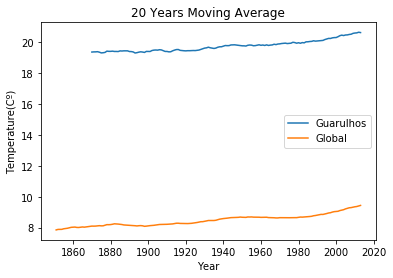

In [6]:
plt.plot(dataSet.year, guarulhosSma, label='Guarulhos')
plt.plot(dataSet.year, globalSma, label='Global')
plt.legend(loc='best')
plt.title(label='20 Years Moving Average')
plt.xlabel('Year')
plt.ylabel('Temperature(Cº)')
plt.show()

The relationship between the global and the local temperatures was analyzed calculating the correlation coefficient. It was used the Pearson correlation coefficient formula to measure how strong is the relationship:
$$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y} = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$

The pandas function **corr()** uses the pearson method by default, so the following implementation was used:

In [7]:
correlationCoefficient = dataSet.global_avg_temp.corr(dataSet.guarulhos_avg_temp)
print ("The correlation coefficient is %.2f" % correlationCoefficient)

The correlation coefficient is 0.79


The formula return a value between -1 and 1, where:
 
    1 indicates a very strong positive relationship.
    -1 indicates a very strong negative relationship.
    0 indicates no relationship at all.

The correlation coefficient is 0.79, so there is a strong relationship between the global and the local temperatures.

## Observations
    - The Guarulhos average temperature is higher than the global average temperature.
    - The global average temperature is increasing faster than the local temperature.
    - Over the last 35 years the global average temperature has increased by around 1 degree.
    - The graphs shows the average temperature is increasing slowly, indicating the earth is getting hotter.